```{contents}
```


## Functions & Linear Transformations

* **Functions in Linear Algebra**

  * A function is a mathematical relationship that maps elements from a **domain (X)** to a **codomain (Y)**.
  * Notation: $f: X \to Y$, meaning function $f$ maps set $X$ to set $Y$.
  * Example: $f(x) = 2x + 3$. If $x=2$, then $f(2)=7$. This shows how inputs (domain) map to outputs (codomain).

* **Vector Example**

  * Consider a vector $(x, y, z) \in \mathbb{R}^3$.
  * Define a function $f(x,y,z) = (x+y, 6z)$.
  * This maps a **3D vector** to a **2D vector**, i.e., $f: \mathbb{R}^3 \to \mathbb{R}^2$.
  * Shows how functions can **reduce dimensions**.

* **Key Insight**

  * Functions are not coding functions; they are **mathematical mappings**.
  * Such mappings (functions) are essential in **data science** and **machine learning**, especially in techniques like **dimensionality reduction** and **PCA (Principal Component Analysis)**.

* **Takeaway**

  * Functions (or transformations) let us map inputs to outputs systematically.
  * In linear algebra, they allow mapping between spaces (e.g., 3D → 2D).
  * This forms the basis of **linear transformations**, which will be explored next.




### Vector Transformation

* **Functions & Mapping Recap**

  * A function maps elements from one set (domain) to another (codomain).
  * Example: A vector in $\mathbb{R}^3$ can be mapped to $\mathbb{R}^2$ using a function.

* **Vector Transformation Definition**

  * A process that maps a vector from one space to another, possibly changing its **magnitude, direction, or both**.
  * Represented as $f: \mathbb{R}^n \to \mathbb{R}^m$.
  * Widely used in **physics, engineering, graphics, and data science**.

* **Example Transformation**

  * Input vector $(1,2,3) \in \mathbb{R}^3$.
  * Function: $f(x,y,z) = (x+y, 2z)$.
  * Output: $(3,6) \in \mathbb{R}^2$.
  * Demonstrates mapping from 3D → 2D.

* **Key Types of Vector Transformations**

  1. **Scaling**

     * Changes magnitude while keeping direction the same.
     * Example: Scale $(2,3)$ by 2 → $(4,6)$.
     * Applications: **Data normalization**, **resizing images in graphics**.

  2. **Rotation**

     * Rotates a vector around the origin or another point.
     * Example: $(1,0)$ rotated 90° CCW → $(0,1)$.
     * Applications: **Image augmentation in deep learning**, **robot orientation in robotics**, **rotating 3D objects in graphics**.

  3. **Reflection**

     * Flips vectors across a specified axis/plane.
     * Example: Reflect $(3,4)$ across the y-axis → $(-3,4)$.
     * Applications: **Mirroring images**, **wave reflections in physics**.

  4. **Shearing** (brief mention)

     * A slanting transformation that shifts one axis in proportion to another.

* **Takeaway**

  * Vector transformations are essential in **data science (normalization, PCA, embeddings)** and **computer graphics (scaling, rotation, reflection, shearing)**.
  * They form the foundation for **linear transformations**, which will be explored next.

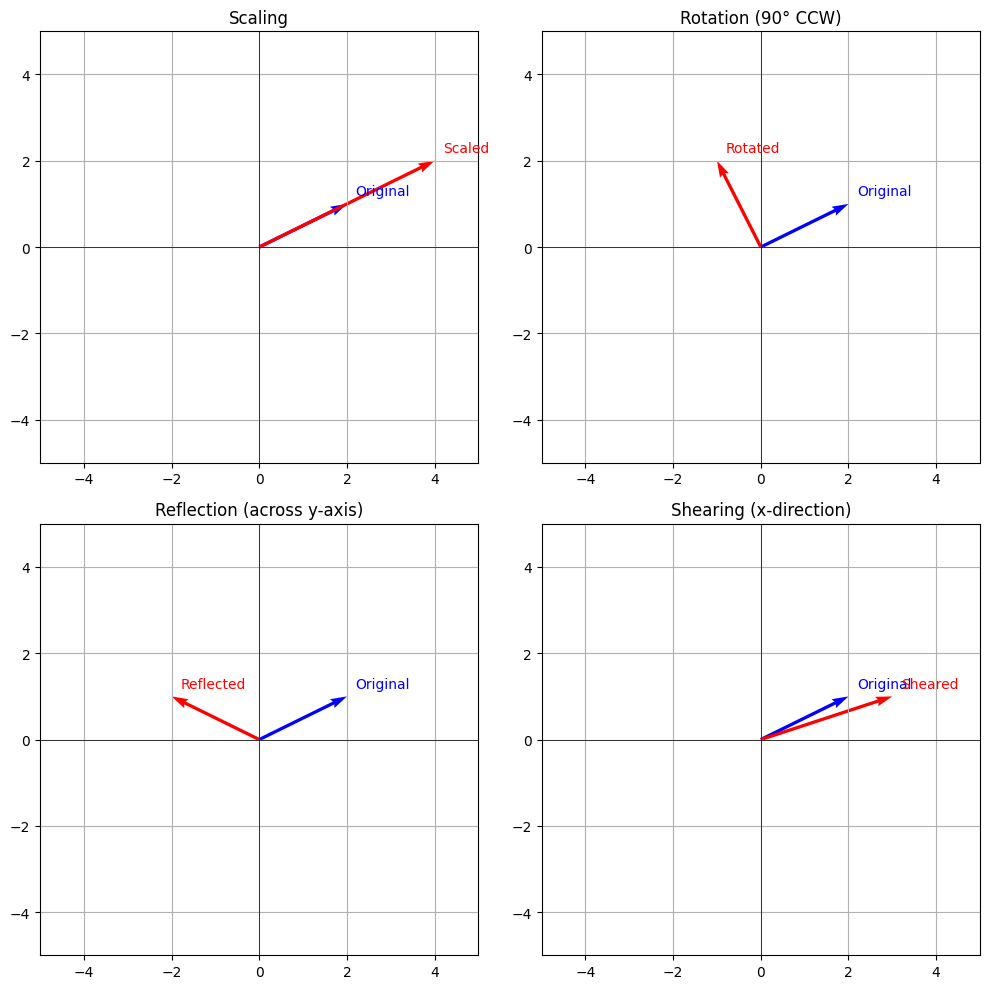

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a vector
def plot_vector(ax, v, color, label):
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color)
    ax.text(v[0] + 0.2, v[1] + 0.2, label, fontsize=10, color=color)

# Original vector
v = np.array([2, 1])

# Transformations
scale_factor = 2
v_scaled = v * scale_factor

theta = np.radians(90)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])
v_rotated = rotation_matrix @ v

v_reflected = np.array([-v[0], v[1]])

shear_matrix = np.array([[1, 1],
                         [0, 1]])
v_sheared = shear_matrix @ v

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Scaling
axs[0, 0].set_title("Scaling")
plot_vector(axs[0, 0], v, 'blue', 'Original')
plot_vector(axs[0, 0], v_scaled, 'red', 'Scaled')
axs[0, 0].set_xlim(-5, 5)
axs[0, 0].set_ylim(-5, 5)
axs[0, 0].axhline(0, color='black', linewidth=0.5)
axs[0, 0].axvline(0, color='black', linewidth=0.5)
axs[0, 0].grid()

# Rotation
axs[0, 1].set_title("Rotation (90° CCW)")
plot_vector(axs[0, 1], v, 'blue', 'Original')
plot_vector(axs[0, 1], v_rotated, 'red', 'Rotated')
axs[0, 1].set_xlim(-5, 5)
axs[0, 1].set_ylim(-5, 5)
axs[0, 1].axhline(0, color='black', linewidth=0.5)
axs[0, 1].axvline(0, color='black', linewidth=0.5)
axs[0, 1].grid()

# Reflection
axs[1, 0].set_title("Reflection (across y-axis)")
plot_vector(axs[1, 0], v, 'blue', 'Original')
plot_vector(axs[1, 0], v_reflected, 'red', 'Reflected')
axs[1, 0].set_xlim(-5, 5)
axs[1, 0].set_ylim(-5, 5)
axs[1, 0].axhline(0, color='black', linewidth=0.5)
axs[1, 0].axvline(0, color='black', linewidth=0.5)
axs[1, 0].grid()

# Shearing
axs[1, 1].set_title("Shearing (x-direction)")
plot_vector(axs[1, 1], v, 'blue', 'Original')
plot_vector(axs[1, 1], v_sheared, 'red', 'Sheared')
axs[1, 1].set_xlim(-5, 5)
axs[1, 1].set_ylim(-5, 5)
axs[1, 1].axhline(0, color='black', linewidth=0.5)
axs[1, 1].axvline(0, color='black', linewidth=0.5)
axs[1, 1].grid()

plt.tight_layout()
plt.show()


### Linear Transformation

A **linear transformation** is a function between two vector spaces that preserves:

1. **Additivity** →  $T(u + v) = T(u) + T(v)$
2. **Homogeneity** →  $T(cu) = c \cdot T(u)$

If both properties hold for all vectors $u, v \in V$ and scalar $c$, then $T$ is a linear transformation.

---

** Example: Reflection across the y-axis**

* Transformation: $T(x, y) = (-x, y)$
* Represented using a matrix:

  $$
  A = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}, \quad T(\vec{x}) = A\vec{x}
  $$
* Proved **additivity** and **homogeneity** step by step.
  ✅ Conclusion: Reflection transformation **is a linear transformation**.

---

**Example: Non-linear Transformation**

* Transformation: $T(x) = x + (1,1)$  (adding a fixed vector)
* Checked with vectors $u = (2,3)$, $v = (4,-1)$, scalar $c=2$.
* Both **additivity** and **homogeneity** conditions failed.
  ❌ Conclusion: This transformation **is not linear**.

---

**Key Takeaways**

* **Linear transformations** preserve structure: scaling, rotation, reflection, shear → all can be expressed as matrix multiplications.
* **Non-linear transformations** break additivity or homogeneity (e.g., adding a constant vector).
* Geometrically, linear transformations always map lines through the origin to lines through the origin.


```{note}
[Click here](https://shad.io/MatVis/) to visualize Linear Transformation 

```


### Why Linear Transformations Are Important in Data Science

Linear transformations are everywhere in **machine learning, deep learning, and data preprocessing**. They preserve additivity and homogeneity while converting one vector into another.

**Key Applications:**

1. **Dimensionality Reduction (PCA)** → project high-dimensional data to lower dimensions while preserving variance.
2. **Feature Engineering** → create new features, capture interactions via linear combinations.
3. **Covariance & Correlation** → statistical measures rely on transformations.
4. **Linear & Ridge Regression** → core algorithms built on linear transformations.
5. **Normalization & Standardization** → rescaling features (0–1 range, mean=0, std=1) requires transformation.
6. **Neural Networks** → forward/backward propagation and activation functions apply linear transformations.
7. **Image & Signal Processing (CNNs)** → convolution filters operate via linear transformations.

**Takeaway:**

* Linear transformations form the **mathematical backbone** of ML/AI workflows.
* They convert vectors $v \to w$ while maintaining structure.
* You'll encounter them in almost every step: EDA, preprocessing, modeling, and deep learning.



### Magnitude of a Vector

* The **magnitude (length)** of a vector represents the distance of the vector from the origin.
* Formula:

  $$
  |x| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}
  $$
* Example: For vector $(2,3)$, the magnitude is:

  $$
  |x| = \sqrt{2^2 + 3^2} = \sqrt{13}
  $$

---

### Unit Vector

* A **unit vector** is a vector with magnitude = 1.
* To convert any vector $v$ into a unit vector $u$:

  $$
  u = \frac{v}{|v|}
  $$
* Example: For $v = (1,2,0)$:

  * Magnitude = $\sqrt{1^2 + 2^2 + 0^2} = \sqrt{5}$
  * Unit vector =

    $$
    u = \left(\frac{1}{\sqrt{5}}, \frac{2}{\sqrt{5}}, 0\right)
    $$
  * Verifying: its magnitude = 1, so it’s indeed a unit vector.

---

### Representation with Basis Vectors

* Unit vectors along axes are denoted as $\hat{i}, \hat{j}, \hat{k}$.
* Example: Vector $(2,3)$ can be written as:

  $$
  2\hat{i} + 3\hat{j}
  $$

---

### Application in Normalization

* **Normalization** rescales vectors (or dataset features) to smaller ranges (e.g., between 0 and 1).
* Useful in machine learning for:

  * Handling features on different scales.
  * Improving optimization in algorithms (e.g., gradient descent).
* Example: Converting large values like ages or weights into normalized scale improves efficiency.

---

**Key Takeaway:**

* **Magnitude** tells you how long a vector is.
* **Unit vector** gives the direction of the vector with length = 1.
* Widely used in **machine learning preprocessing (normalization), optimization, and feature scaling**.


###  Projections

* A **vector** can be scaled by a real number $c$ to form a **line** in its direction.
* Projection means **dropping a shadow** of one vector ($x$) onto another vector or line ($v$).

---

### Key Idea

* The **projection of vector $x$ onto line $L$** (spanned by vector $v$) is the point on $L$ closest to $x$.
* Geometrically: The difference $x - \text{Proj}_L(x)$ is **perpendicular** to $L$.

---

### Mathematical Derivation

1. Projection lies along $v$, so:

   $$
   \text{Proj}_L(x) = c \cdot v
   $$
2. Condition:

   $$
   (x - c v) \cdot v = 0
   $$

   (perpendicular property).
3. Solving for $c$:

   $$
   c = \frac{x \cdot v}{v \cdot v}
   $$
4. Final projection formula:

   $$
   \text{Proj}_L(x) = \frac{x \cdot v}{v \cdot v} \, v
   $$

---

### Important Property

* If two vectors are **perpendicular**, their **dot product = 0**.
  Example:

  * $a = (1,2)$, $b = (-2,1)$ → $a \cdot b = 0$.

---

### Example Calculation

* Line vector: $v = (2,1)$.
* Vector to project: $x = (2,3)$.
* Compute:

  $$
  \text{Proj}_L(x) = \frac{x \cdot v}{v \cdot v} \, v
  $$

  * $x \cdot v = 2(2) + 3(1) = 7$
  * $v \cdot v = 2^2 + 1^2 = 5$
  * Projection = $\frac{7}{5} (2,1) = (2.8, 1.4)$

✅ The projection of $(2,3)$ onto the line spanned by $(2,1)$ is $(2.8, 1.4)$.

---


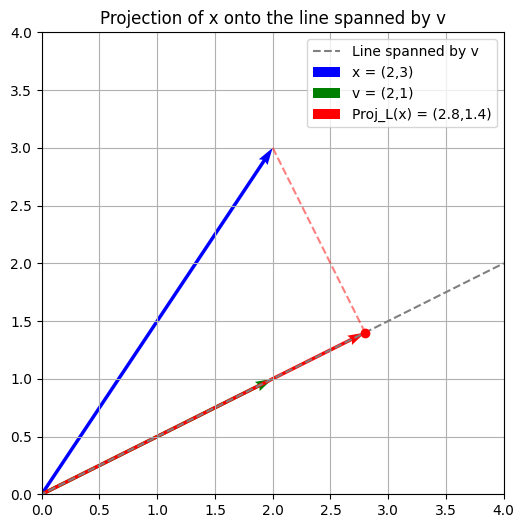

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Vectors
v = np.array([2, 1])
x = np.array([2, 3])
proj = (np.dot(x, v) / np.dot(v, v)) * v

# Create line for v (the line L)
t = np.linspace(-1, 2, 100)
line = np.outer(t, v)

plt.figure(figsize=(6,6))
# Plot line
plt.plot(line[:,0], line[:,1], 'gray', linestyle='--', label='Line spanned by v')

# Plot vectors
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x = (2,3)')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green', label='v = (2,1)')
plt.quiver(0, 0, proj[0], proj[1], angles='xy', scale_units='xy', scale=1, color='red', label='Proj_L(x) = (2.8,1.4)')

# Plot projection point and dashed line to x
plt.plot(proj[0], proj[1], 'ro')
plt.plot([proj[0], x[0]], [proj[1], x[1]], 'r--', alpha=0.5)

plt.xlim(0, 4)
plt.ylim(0, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.title("Projection of x onto the line spanned by v")
plt.show()




**Takeaways**

* Projection = closest point on a line/vector.
* Formula:

  $$
  \text{Proj}_L(x) = \frac{x \cdot v}{v \cdot v} \, v
  $$
* Useful in **geometry, optimization, regression, and dimensionality reduction (e.g., PCA)**.

